In [1]:
import torch
import numpy as np

In [2]:
embeddings = np.load("processed/embeddings.npy")
gt = np.load("processed/images.npy")
checkpoint = torch.load("ckpt/best_ckpt.pth")

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)
embeddings_plot = pca.fit_transform(embeddings)

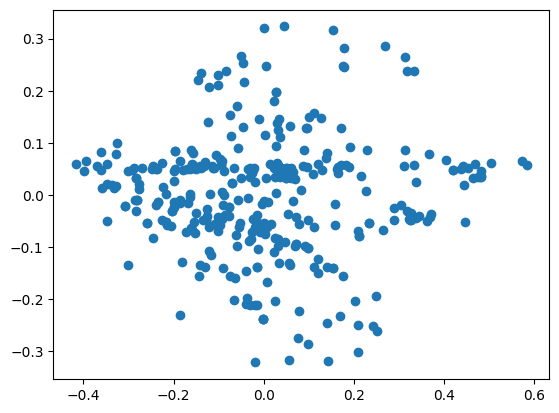

In [5]:
import matplotlib.pyplot as plt
plt.scatter(embeddings_plot[:, 0], embeddings_plot[:, 1])
plt.show()

In [6]:
from model import TextureDecoder

model = TextureDecoder()
model.load_state_dict(checkpoint)
model = model.cuda()

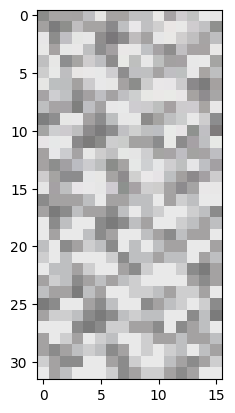

In [117]:
i = 142

embedding = embeddings[i:i+1]

input = torch.from_numpy(embedding).float().cuda()
output = model(input)

test = output[0].detach().cpu().numpy()
target = gt[i]

demo = np.hstack([test, target])

imgplot = plt.imshow(np.transpose(demo, (1, 2, 0)))
plt.show()